In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
dfe = pd.read_csv(r"C:\Users\Saniya Mirza\Downloads\archive (18)\emails.csv",encoding = 'latin1')

In [4]:
dfe

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


### Data Separation

In [5]:
x = dfe["text"]

In [6]:
x

0       Subject: naturally irresistible your corporate...
1       Subject: the stock trading gunslinger  fanny i...
2       Subject: unbelievable new homes made easy  im ...
3       Subject: 4 color printing special  request add...
4       Subject: do not have money , get software cds ...
                              ...                        
5723    Subject: re : research and development charges...
5724    Subject: re : receipts from visit  jim ,  than...
5725    Subject: re : enron case study update  wow ! a...
5726    Subject: re : interest  david ,  please , call...
5727    Subject: news : aurora 5 . 2 update  aurora ve...
Name: text, Length: 5728, dtype: object

In [7]:
y = dfe["spam"]

In [8]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5723    0
5724    0
5725    0
5726    0
5727    0
Name: spam, Length: 5728, dtype: int64

In [9]:
y.value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

<Axes: xlabel='spam'>

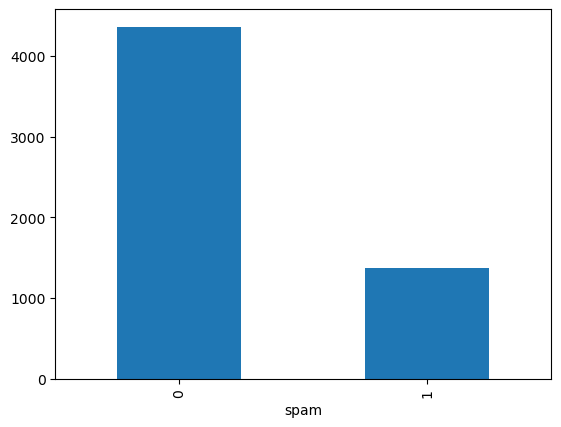

In [10]:
y.value_counts().plot(kind = "bar")

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
cvec = CountVectorizer()

In [13]:
cvec

CountVectorizer()

In [14]:
cvec.fit(x)

CountVectorizer()

In [15]:
cvec.transform(x)

<5728x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 708380 stored elements in Compressed Sparse Row format>

In [16]:
cvec_spam = cvec.transform(x)

In [17]:
cvec_spam

<5728x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 708380 stored elements in Compressed Sparse Row format>

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer

In [19]:
trans = TfidfTransformer()

In [20]:
trans

TfidfTransformer()

In [21]:
trans.fit(cvec_spam)

TfidfTransformer()

In [22]:
trans.transform(cvec_spam)

<5728x37303 sparse matrix of type '<class 'numpy.float64'>'
	with 708380 stored elements in Compressed Sparse Row format>

In [23]:
trans_text = trans.transform(cvec_spam)

In [24]:
trans_text

<5728x37303 sparse matrix of type '<class 'numpy.float64'>'
	with 708380 stored elements in Compressed Sparse Row format>

### Imbalance

In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
ros = RandomOverSampler()

In [27]:
ros

RandomOverSampler()

In [28]:
x_ros,y_ros = ros.fit_resample(trans_text,y)

In [29]:
x.shape

(5728,)

In [30]:
x_ros.shape

(8720, 37303)

In [31]:
y.shape

(5728,)

In [32]:
y_ros.shape

(8720,)

In [33]:
y.value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

In [34]:
y_ros.value_counts()

spam
1    4360
0    4360
Name: count, dtype: int64

<Axes: xlabel='spam'>

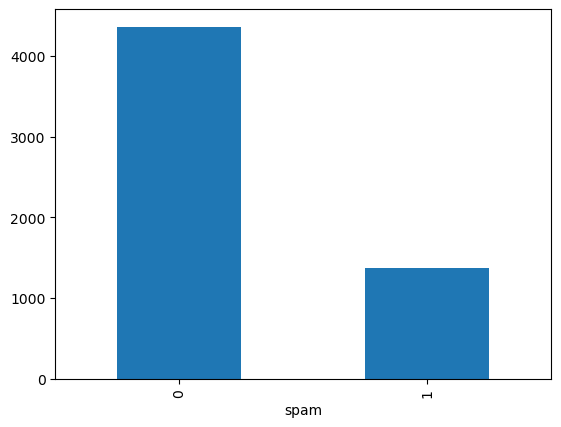

In [35]:
y.value_counts().plot(kind = "bar")

<Axes: xlabel='spam'>

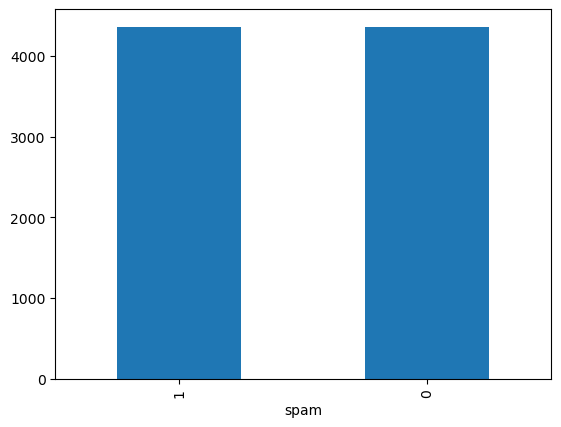

In [36]:
y_ros.value_counts().plot(kind = "bar")

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
mnb = MultinomialNB()

In [39]:
mnb

MultinomialNB()

In [40]:
mnb.fit(x_ros,y_ros)

MultinomialNB()

In [41]:
mnb.score(x_ros,y_ros)

0.9980504587155963

### Prediction - 1

In [42]:
msg1 = ["IBSAT 2024 Application Form Closing on 18th Dec, Apply Now"]

In [43]:
msg1

['IBSAT 2024 Application Form Closing on 18th Dec,\xa0Apply\xa0Now']

In [44]:
cvec.transform(msg1)

<1x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [45]:
cvec_msg1 = cvec.transform(msg1)

In [46]:
trans.transform(cvec_msg1)

<1x37303 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [47]:
trans_msg1 = trans.transform(cvec_msg1)

In [48]:
mnb.predict(trans_msg1)

array([1], dtype=int64)

### Prediction - 2

In [49]:
msg2 = ["""You're out of storage and will stop receiving emails in 28 days
100% full	15 GBYouve used all 15 GB of your Google Account storage. If you don't take action by 6 Jan 2025, emails sent to you will bounce back to the sender and can't be recovered later. Without storage, you can no longer:
 		Send and receive emails on Gmail after 28 days	 
 		Back up new photos and videos to Google Photos	 
 		Upload new files to Google Drive	 
 		Edit and create new files using Google Docs, Sheets, Slides, Forms and more	 
Get more storage with a Google One membership"""]

In [50]:
msg2

["You're out of storage and will stop receiving emails in 28 days\n100% full\t15 GBYouve used all 15 GB of your Google Account storage. If you don't take action by 6 Jan 2025, emails sent to you will bounce back to the sender and can't be recovered later. Without storage, you can no longer:\n \t\tSend and receive emails on Gmail after 28 days\t \n \t\tBack up new photos and videos to Google Photos\t \n \t\tUpload new files to Google Drive\t \n \t\tEdit and create new files using Google Docs, Sheets, Slides, Forms and more\t \nGet more storage with a Google\xa0One\xa0membership"]

In [51]:
cvec.transform(msg2)

<1x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 64 stored elements in Compressed Sparse Row format>

In [52]:
cvec_msg2 = cvec.transform(msg2)

In [53]:
trans.transform(cvec_msg2)

<1x37303 sparse matrix of type '<class 'numpy.float64'>'
	with 64 stored elements in Compressed Sparse Row format>

In [54]:
trans_msg2 = trans.transform(cvec_msg2)

In [55]:
mnb.predict(trans_msg2)

array([0], dtype=int64)

### Prediction - 3

In [56]:
msg3 = ["""Apollo Hiring Nutritionist (Kannada mandatory)- WFO- Hyderabad
		Hyderabad/Secunderabad
		0 - 3 years
		3.0 lacs - 3.5 lacs
		In office
		Nutrition, Dietitian Activities, Diet Counselling, Dietetics, Nutritionist Activities"""]

In [57]:
msg3

['Apollo Hiring Nutritionist (Kannada mandatory)- WFO- Hyderabad\n\t\tHyderabad/Secunderabad\n\t\t0 - 3 years\n\t\t3.0 lacs - 3.5 lacs\n\t\tIn office\n\t\tNutrition, Dietitian Activities, Diet Counselling, Dietetics, Nutritionist\xa0Activities']

In [58]:
cvec.transform(msg3)

<1x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [59]:
cvec_msg3 = cvec.transform(msg3)

In [60]:
trans.transform(cvec_msg3)

<1x37303 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [61]:
trans_msg3 = trans.transform(cvec_msg3)

In [62]:
mnb.predict(trans_msg3)

array([0], dtype=int64)